# Simple neural network
Coffee roasting with logistic regression <br>
Using tensor module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
plt.style.use('./deeplearning.mplstyle')

In [2]:
X, y = load_coffee_data()
print(X.shape, y.shape)

(200, 2) (200, 1)


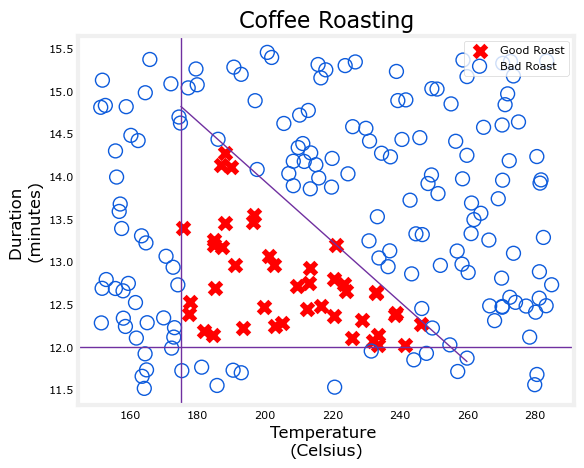

In [4]:
plt_roast(X, y)

# Data points and Normalization

In [5]:
#pre normalisation
print(f"Temperature Max, Min pre normalisation are: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")

print(f"Duration Max, Min pre normalisation are: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

#normalize the data
norm_1 = tf.keras.layers.Normalization(axis=-1)
norm_1.adapt(X) #learn mean, variance
Xn = norm_1(X)

#post normalization
print(f"Temperature Max, Min pre normalisation are: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")

print(f"Duration Max, Min pre normalisation are: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalisation are: 284.99, 151.32
Duration Max, Min pre normalisation are: 15.45, 11.51
Temperature Max, Min pre normalisation are: 1.66, -1.69
Duration Max, Min pre normalisation are: 1.79, -1.70


# Tile/copy method to increase the training set size 

1.what tile/copy does is it increases the data set <br>
by replicating the same data points ie.. copying the data points <br>
which increases the data size which is essential for training. <br>
It is used mostly in Machine learning models where we have a limited <br>
data set. <br>
2. Once the data points are decided we then shuffle the data points randomly <br>
to ensure that the model is unbiased towards a particular dataset.

In [ ]:
Xt = np.tile()